# Using Personal Key Indicators to Predict Heart Disease

## The algorithms covered in this notebook are:
1. Heuristic Bayesian Network
2. Naive Bayes
3. Learned Bayesian Network

## Explanation of Variables in the Datset
1. HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
2. BMI : Body Mass Index (BMI).
3. Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
4. AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
5. Stroke : (Ever told) (you had) a stroke?
6. PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
7. MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
8. DiffWalking : Do you have serious difficulty walking or climbing stairs?
9. Sex : Are you male or female?
10. AgeCategory: Fourteen-level age category.
11. Race : Imputed race/ethnicity value.
12. Diabetic : (Ever told) (you had) diabetes?
13. PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
14. GenHealth : Would you say that in general your health is...
15. SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
16. Asthma : (Ever told) (you had) asthma?
17. KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18. SkinCancer : (Ever told) (you had) skin cancer?


## Importing Libraries and Loading in Data

In [60]:
import gnb as gnb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from sklearn.metrics import accuracy_score
import pyAgrum.skbn as skbn
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

data = pd.read_csv('heart_2020_cleaned.csv')
data.head

<bound method NDFrame.head of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  Age

## Summary of Numerical Features

In [61]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## Data Cleaning

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

*Data Shows that we have 319795 entries with 18 columns. No Null values and 14 discrete and 4 continuous variables*

## Exploratory Data Analysis

### Visualisation of Categorical Binary Variables

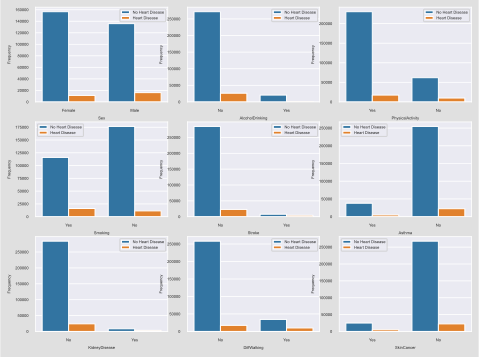

In [63]:
plt.rcParams.update({'font.size': 4})
catagoricalVariables = ['Sex', 'Smoking', 'KidneyDisease', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'SkinCancer']
fig, ax = plt.subplots(3, 3)
fig.tight_layout(h_pad=2)
x = 0
y = 0
for i in catagoricalVariables:
    sns.countplot(x= data[i], hue = 'HeartDisease', data = data, ax=ax[x, y])
    ax[x, y].set_xlabel(i)
    ax[x, y].legend(['No Heart Disease', 'Heart Disease'])
    ax[x, y].set_ylabel('Frequency')
    #ax[x, y].set_title(i)
    x += 1
    if (x == 3):
        y += 1
        x = 0
fig.savefig("BinaryVar")

###  Visualisation of Other Categorical Variables

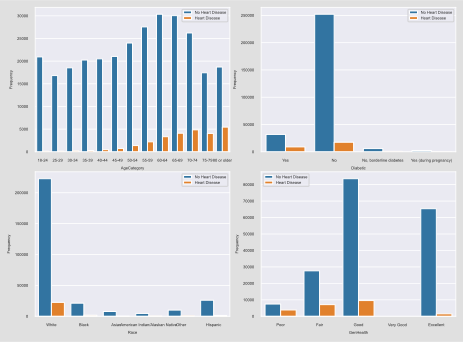

In [64]:
plt.rcParams.update({'font.size': 4})
catagoricalVariables = ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']
fig, ax = plt.subplots(2, 2)
fig.tight_layout(h_pad=2, w_pad=4, pad=3)
x = 0
y = 0
for i in catagoricalVariables:
    if (i == 'AgeCategory'):
        order = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80 or older"]
        sns.countplot(x= data[i], hue = 'HeartDisease', data = data, ax=ax[x, y], order = order)
    elif (i == "GenHealth"):
      order = ["Poor", "Fair", "Good", "Very Good", "Excellent"]
      sns.countplot(x= data[i], hue = 'HeartDisease', data = data, ax=ax[x, y], order = order)
    else:
        sns.countplot(x= data[i], hue = 'HeartDisease', data = data, ax=ax[x, y])
    ax[x, y].set_xlabel(i)
    ax[x, y].legend(['No Heart Disease', 'Heart Disease'])
    ax[x, y].set_ylabel('Frequency')
    #ax[x, y].set_title(i)
    x += 1
    if (x == 2):
        y += 1
        x = 0
plt.show()

### Visualisation of Continuous Variables

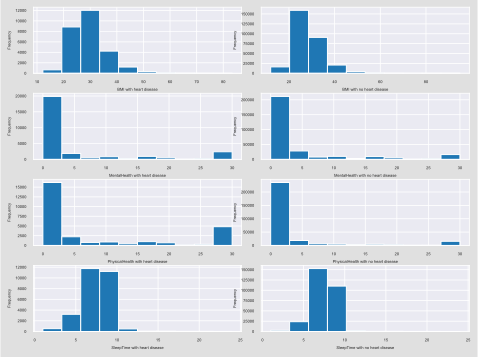

In [65]:
plt.rcParams.update({'font.size': 4})
HeartDisease = data.loc[data['HeartDisease'] == "Yes"]
NoHeartDisease = data.loc[data["HeartDisease"] == "No"]
continousVariables = ['BMI', 'MentalHealth', 'PhysicalHealth', 'SleepTime']
fig, ax = plt.subplots(4, 2)
fig.tight_layout(h_pad=2)
x = 0
y = 0

for i in continousVariables:
    ax[x, 0].hist(HeartDisease[i])
    ax[x, 0].set_xlabel(i + " with heart disease")
    ax[x, 0].set_ylabel('Frequency')
    ax[x, 1].hist(NoHeartDisease[i])
    ax[x, 1].set_xlabel(i + ' with no heart disease')
    ax[x, 1].set_ylabel("Frequency")
    #ax[x, y].set_title(i)
    x +=1
fig.savefig("BinaryVar")

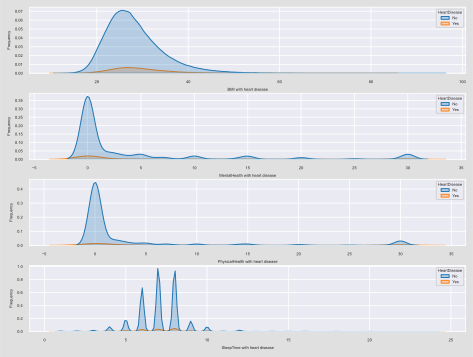

In [66]:
plt.rcParams.update({'font.size': 4})
HeartDisease = data.loc[data['HeartDisease'] == "Yes"]
NoHeartDisease = data.loc[data["HeartDisease"] == "No"]
continousVariables = ['BMI', 'MentalHealth', 'PhysicalHealth', 'SleepTime']
fig, ax = plt.subplots(4, 1)
fig.tight_layout(h_pad=2)
x = 0
y = 0

for i in continousVariables:
    sns.kdeplot(ax=ax[x], data=data, x=i, hue='HeartDisease', fill=True)
    ax[x].set_xlabel(i + " with heart disease")
    ax[x].set_ylabel('Frequency')
    x +=1
fig.savefig("BinaryVar")

## Correlation Plot

interval columns not set, guessing: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


ValueError: Format 'pmg' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

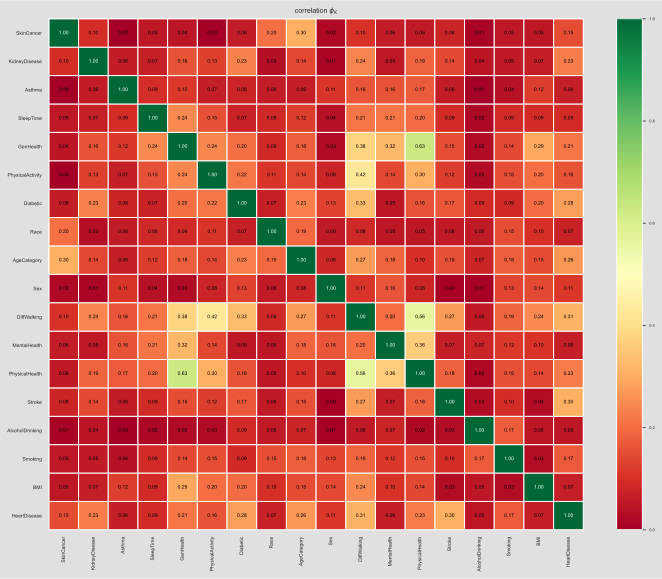

In [67]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

phik_overview = data.phik_matrix()
phik_overview.round(1)
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1,
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.5,
                        figsize=(10, 8))
plt.tight_layout()
plt.savefig("corr.png")

interval columns not set, guessing: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No     

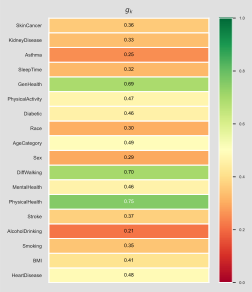

In [68]:
global_correlation, global_labels = data.global_phik()

plot_correlation_matrix(global_correlation,
                        x_labels=[''], y_labels=global_labels,
                        vmin=0, vmax=1, figsize=(3.5,4),
                        title=r"$g_k$",
                        fontsize_factor=0.5)
plt.tight_layout()
print(data)
datacopy = data

# Data Preparation

## Discretise Continous Variables

In [70]:
# Discretise BMI
data = pd.read_csv('heart_2020_cleaned.csv')
#print(data)
def disBMI(data):
    BMI = (data['BMI'])
    if BMI < 20:
        return "0-20"
    elif BMI < 30:
        return "20-30"
    elif BMI < 40:
        return "30-40"
    elif BMI < 50:
        return "40-50"
    elif BMI < 60:
        return "50-60"
    elif BMI < 70:
        return "60-70"
    elif BMI< 80:
        return "70-80"
    else:
        return "80-100"

def disMentalHealth(row):
    mentalHealth = int(row['MentalHealth'])
    if mentalHealth < 10:
        return "0-9"
    elif mentalHealth < 20:
        return "10-19"
    else:
        return "20-30"

def disPhysicalHealth(row):
    physicalHealth = int(row['PhysicalHealth'])
    if physicalHealth < 10:
        return "0-9"
    elif physicalHealth < 20:
        return "10-19"
    else:
        return "20-30"

def disSleepTime(row):
    sleepTime = float(row['SleepTime'])
    if sleepTime < 4:
        return "0-3"
    elif sleepTime < 7:
        return "3-6"
    elif sleepTime < 10:
        return "6-9"
    elif sleepTime < 12:
        return "10-12"
    else:
        return "Greater than 12"

#print(data)
def treat(data):
    data['BMI'] = data.apply(disBMI, axis=1)
    data["MentalHealth"] = data.apply(disMentalHealth, axis=1)
    data["PhysicalHealth"] = data.apply(disPhysicalHealth, axis=1)
    data["SleepTime"] = data.apply(disSleepTime, axis=1)
    return data

treat(data)
data.to_csv("disHeart_2020_cleaned.csv")

## Calculate Empirical Probabilities

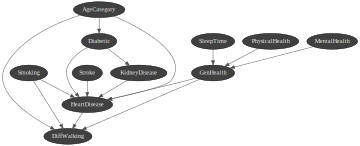

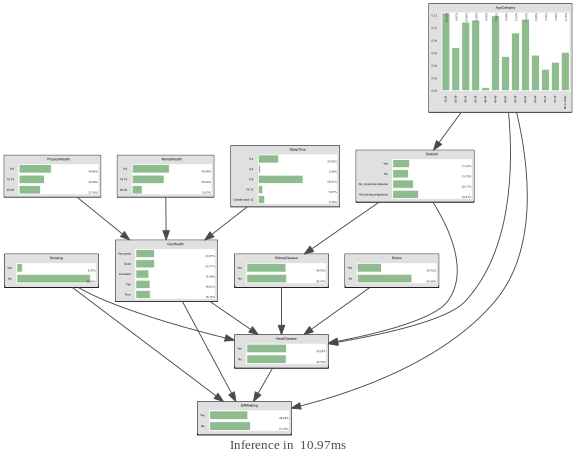

In [71]:
data = pd.read_csv('disheart_2020_cleaned.csv')
training_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(training_data.index)
# Draw Network with no probabilities
bn = gum.fastBN("HeartDisease{Yes|No}<-Smoking{Yes|No}->DiffWalking{Yes|No}; PhysicalHealth{0-9|10-19|20-30}->GenHealth{Very good|Good|Excellent|Fair|Poor}->HeartDisease<-KidneyDisease{Yes|No}<-Diabetic{Yes|No|No, borderline diabetes|Yes (during pregnancy)}->HeartDisease; MentalHealth{0-9|10-19|20-30}->GenHealth<-SleepTime{0-3|3-6|6-9|10-12|Greater than 12}; Stroke{Yes|No}->HeartDisease; GenHealth->DiffWalking<-HeartDisease; HeartDisease<-AgeCategory{18-24|25-29|30-34|35-39|40-44|45-49|50-54|55-59|60-64|65-69|70-74|75-79|80 or older}->DiffWalking; AgeCategory->Diabetic")
#gnb.showBN(bn)
probDict = {
    'Smoking': [0,0],
    'DiffWalking': 0,
    'PhysicalHealth': 0,
}

learner = gum.BNLearner(training_data, bn)
# bn2 = learner.learnBN()
learner.useSmoothingPrior(1)
bn2 = learner.learnParameters(bn.dag())
gnb.showBN(bn2)
img = gnb.showInference(bn)
showROC_PR(bn, "disHeart_2020_cleaned.csv", "HeartDisease", "Yes", False, True)
# First Calculate Non-Conditional Probabilities



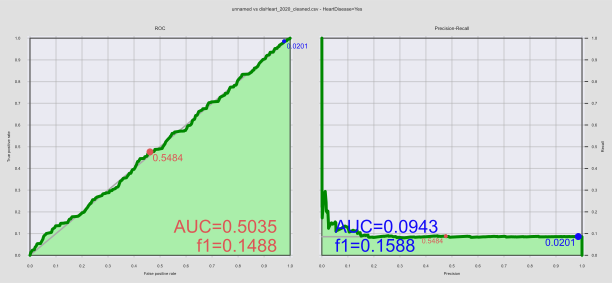

76.99% good predictions


In [74]:
from pyAgrum.lib.bn2roc import showROC_PR

# Test Predictions
ie=gum.LazyPropagation(bn)

def init_belief(engine):
    # Initialize evidence
    for var in engine.BN().names():
        if var != 'HeartDisease':
            engine.addEvidence(var, 0)

def update_beliefs(engine, bayesNet, row):
    # Update beliefs from a given row less the Survived variable
    for var in bayesNet.names():
        if var == "HeartDisease":
            continue
        try:
            label = str(row.to_dict()[var])
            idx = bayesNet.variable(var).index(str(row.to_dict()[var]))
            engine.chgEvidence(var, idx)
        except gum.NotFound:
            # this can happend when value is missing is the test base.
            pass
    engine.makeInference()

def is_well_predicted(engine, bayesNet, auc, row):
    update_beliefs(engine, bayesNet, row)
    marginal = engine.posterior('HeartDisease')
    outcome = row.to_dict()['HeartDisease']
    if outcome == "Yes": # Did not survived
        if marginal.toarray()[1] < auc:
            return "True Positive"
        else:
            return "False Negative"
    else: # Survived
        if marginal.toarray()[1] >= auc:
            return "True Negative"
        else:
            return "False Positive"
showROC_PR(bn, "disHeart_2020_cleaned.csv", "HeartDisease", "Yes", False, True)
init_belief(ie)

ie.addTarget('HeartDisease')
result = test_data.apply(lambda x: is_well_predicted(ie, bn, 0.15, x), axis=1)
result.value_counts(True)

positives = sum(result.map(lambda x: 1 if x.startswith("True") else 0 ))
total = result.count()
print("{0:.2f}% good predictions".format(positives/total*100))
# goodPredictions = 0
# badPredictions = 0
# def checkPred(row):
#     evs = {"PhysicalHealth":0, "Smoking": 0, "GenHealth": 0, "DiffWalking": 0,
#            "Diabetic": 0, "AgeCategory": 0, "Stroke": 0, "MentalHealth": 0,
#            "SleepTime": 0, "KidneyDisease": 0}
#     cat = evs = {"PhysicalHealth", "Smoking", "GenHealth", "DiffWalking","Diabetic", "AgeCategory", "Stroke", "MentalHealth","SleepTime", "KidneyDisease"}
#     for var in row:
#         for i in cat:
#             evs[i] = row[i]
#
#
# data.apply(checkPred, axis=1)

In [ ]:
# Data Preparation
dataTrain = data.sample(frac=0.2)

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# print(X_train)

In [ ]:
# Naive Bayes Section

# for k in X_train.keys():
#     if len(X_train[k].unique())<=15:
#         print(k)
#
# def forAge(row):
#     try:
#         age = float(row['Age'])
#         if age < 30:
#             #return '[0;1['
#             return '20 - 29'
#         elif age < 40:
#             #return '[1;6['
#             return '30 - 39'
#         elif age < 50:
#             #return '[6;12['
#             return '40 - 49'
#         elif age < 60:
#             #return '[12;21['
#             return '50 - 59'
#         elif age < 70:
#             #return '[21;80['
#             return '60 - 69'
#         else:
#             #return '[80;200]'
#             return '70 and older'
#     except ValueError:
#         return np.nan



In [ ]:
# Naive Bayes
template = gum.BayesNet("Heart Disease")
template.add(gum.LabelizedVariable("HeartDisease", "Heart Disease", ['No', 'Yes']))
template.add(gum.LabelizedVariable("Smoking", "Smoking", ['No', 'Yes']))
template.add(gum.LabelizedVariable("AlcoholDrinking", "AlcoholDrinking", ['No', 'Yes']))
template.add(gum.LabelizedVariable("Stroke", "Stroke", ['No', 'Yes']))
gnb.showBN(template)

In [ ]:
# dataTrain = dataTrain.drop('BMI', axis = 1)
# dataTrain = dataTrain.drop('PhysicalHealth', axis = 1)
# learner = gum.BNLearner(dataTrain)
# bn = learner.learnBN()
# bn

In [ ]:
test_data = data['HeartDisease']
test_data.head()
train_pred = data.drop(['HeartDisease'], axis =1)
train_pred.head()
X_train, X_test, y_train, y_test = train_test_split(train_pred, test_data, test_size=0.2, random_state=0)
y_train.head()

In [ ]:
bn2 = skbn.BNClassifier(prior='NoPrior')
bn2.fit(data = 'heart_2020_cleaned.csv', targetName="HeartDisease")
y_test_pred = bn2.predict(X_test)

print("{0:.2f}% good predictions".format(accuracy_score(y_test, y_test_pred)*100))
gnb.showBN(bn2.bn, )